### 1. Dataset: Sample Super store

In [1]:

#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings   
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('C:/Users/preet/Downloads/SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#checking how many null values are present in each of the columns
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### The data has no NaN values. 

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

In [9]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [10]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [11]:
df = df.drop(['Postal Code'], axis =1)
# dropping postal code coloumn since its not relevant to our analysis

In [12]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [ ]:
#sales and discount have an inverse relationship
#Profit and discount also have an inverse relationship

In [13]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


In [14]:
col = ['Quantity', 'Discount','Profit' ]

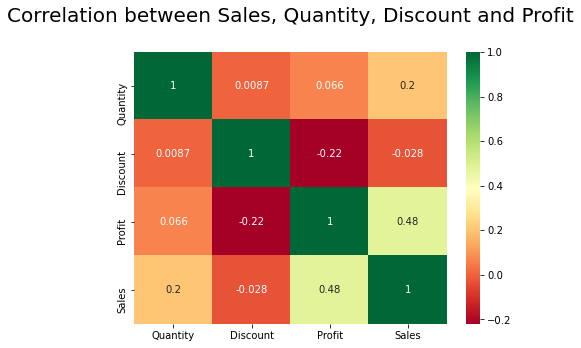

In [32]:
plt.figure(figsize= [7,5])

sns.heatmap(df[col+["Sales"]].corr(), cmap="RdYlGn",annot=True)

plt.title("Correlation between Sales, Quantity, Discount and Profit", fontdict={"fontsize":20}, pad=30)
plt.show()

In [17]:
df_1 = df.drop(['Discount'], axis =1)

### Data Visualization

In [18]:
category_group = df_1.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
segment_group = df_1.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
region_group = df_1.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
state_group = df_1.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
shipmode_group = df_1.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

In [19]:
category_group 

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.971969,3.822764,43.198582
2,Furniture,Furnishings,95.902745,3.723849,13.653476
3,Furniture,Tables,648.794771,3.890282,-55.565771
4,Office Supplies,Appliances,230.755710,3.710300,38.922758
5,Office Supplies,Art,34.096896,3.768553,8.207059
6,Office Supplies,Binders,133.645972,3.923127,19.860710
7,Office Supplies,Envelopes,64.867724,3.566929,27.418019
8,Office Supplies,Fasteners,13.936774,4.211982,4.375660
9,Office Supplies,Labels,34.283504,3.845730,15.224193


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

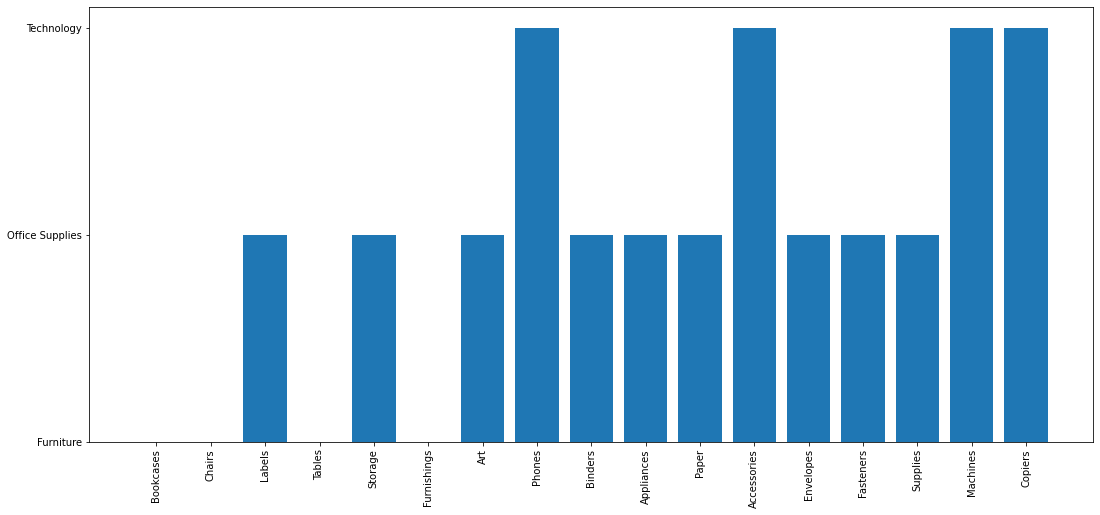

In [26]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category', 'Category', data = df_1)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

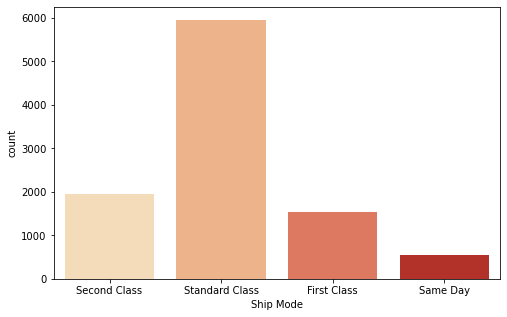

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_1['Ship Mode'], palette = 'OrRd')

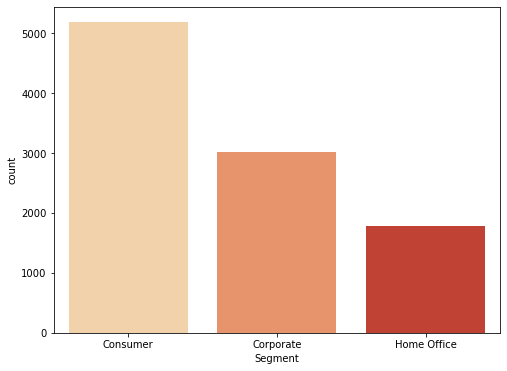

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_1['Segment'],palette = 'OrRd')
plt.show()

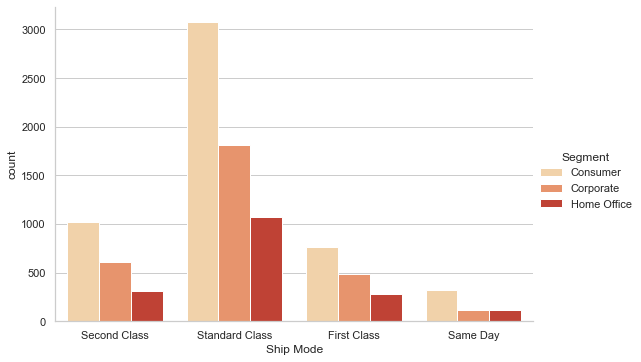

In [91]:
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="OrRd")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Philadelphia'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'San Diego'),
  Text(9, 0, 'Springfield'),
  Text(10, 0, 'Dallas'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'Newark'),
  Text(14, 0, 'Richmond'),
  Text(15, 0, 'Jackson'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Aurora'),
  Text(18, 0, 'Phoenix'),
  Text(19, 0, 'Long Beach'),
  Text(20, 0, 'Arlington'),
  Text(21, 0, 'San Antonio'),
  Text(22, 0, 'Miami'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'Rochester'),
  Text(25, 0, 'Charlotte'),
  Text(26, 0, 'Henderson'),
  Text(27, 0, 'Lakewood'),
  Text(

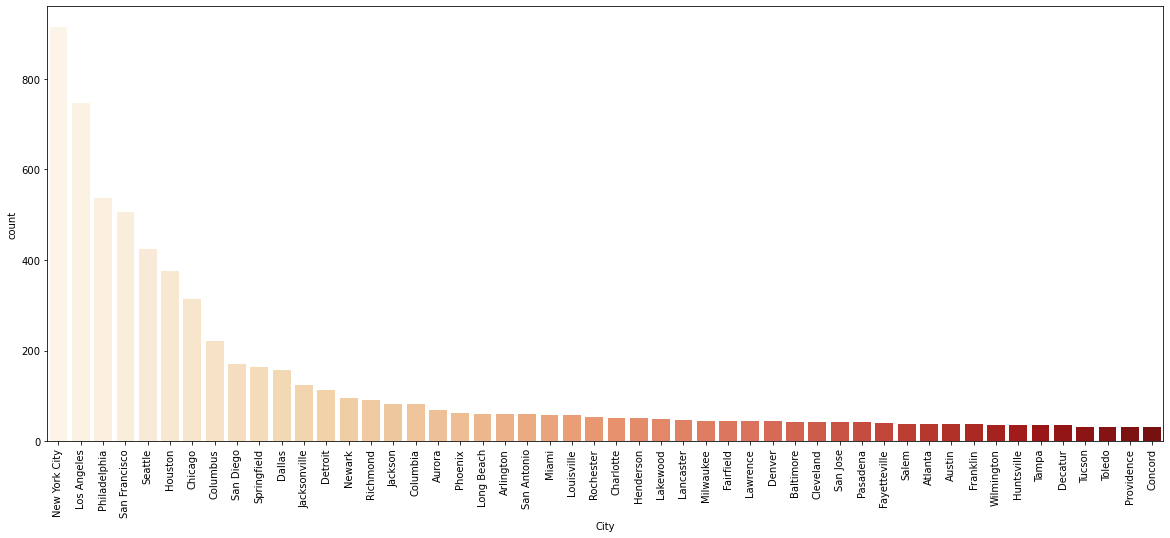

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(x=df_1['City'], order=(df_1['City'].value_counts().head(50)).index, palette = 'OrRd')
plt.xticks(rotation=90)

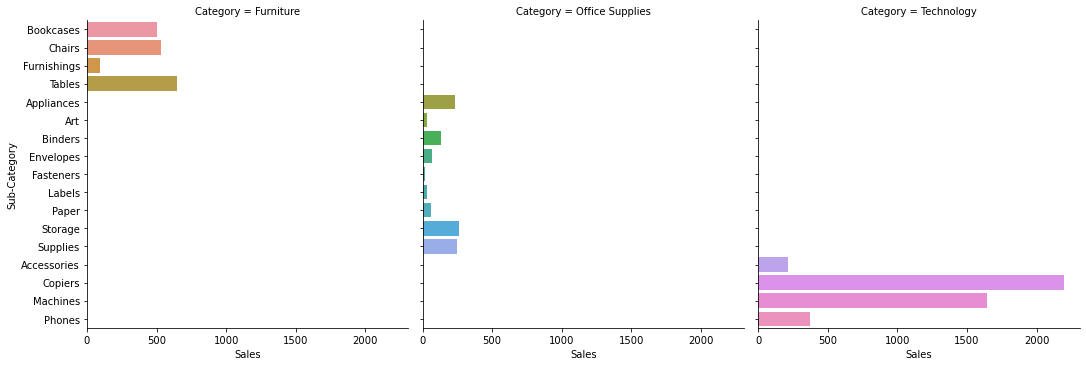

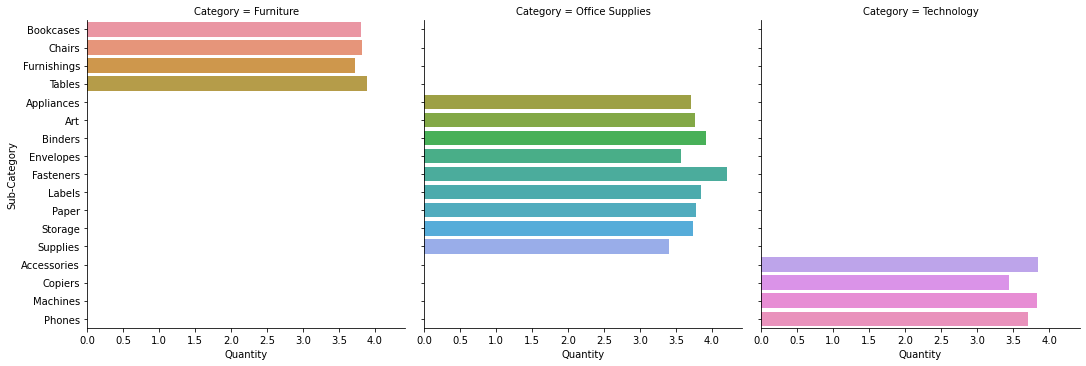

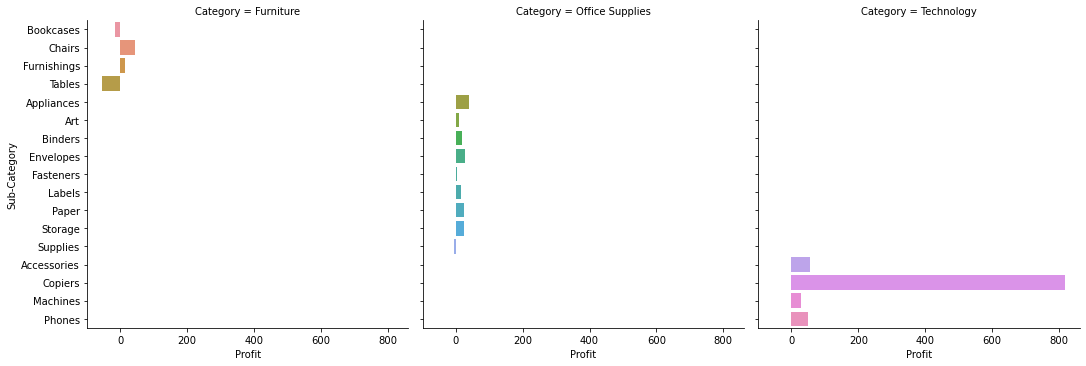

In [21]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

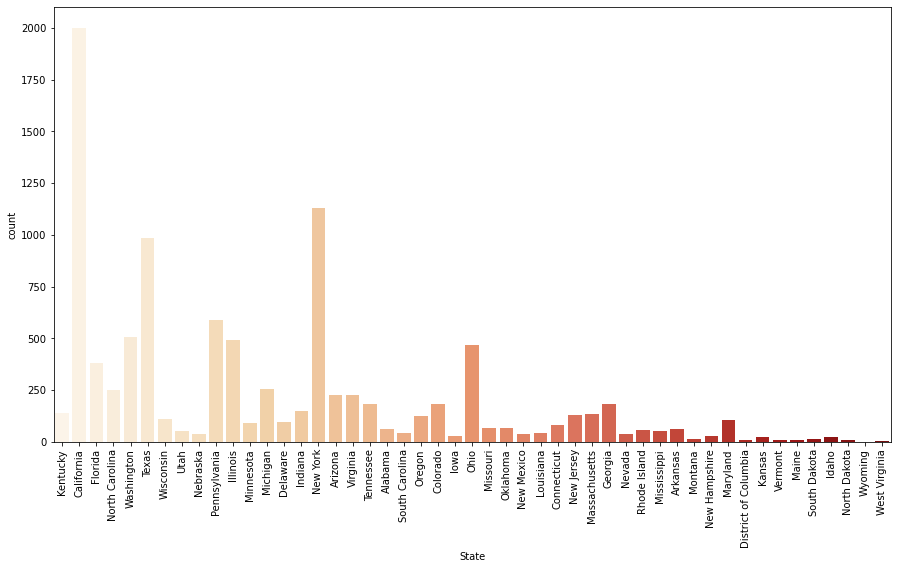

In [48]:
print(df_1['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df_1['State'], palette='OrRd')
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


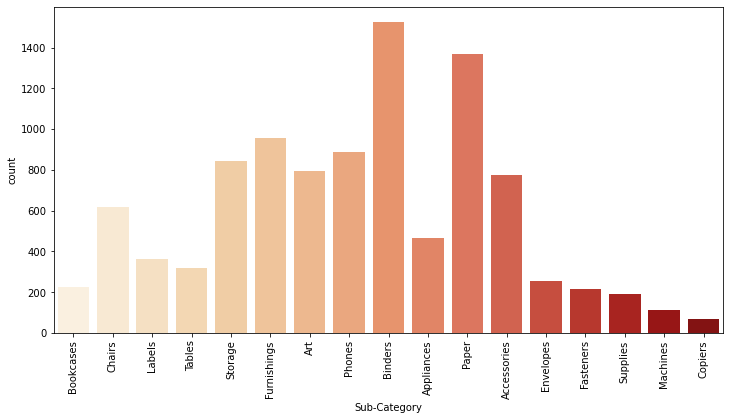

In [50]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'], palette = 'OrRd')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

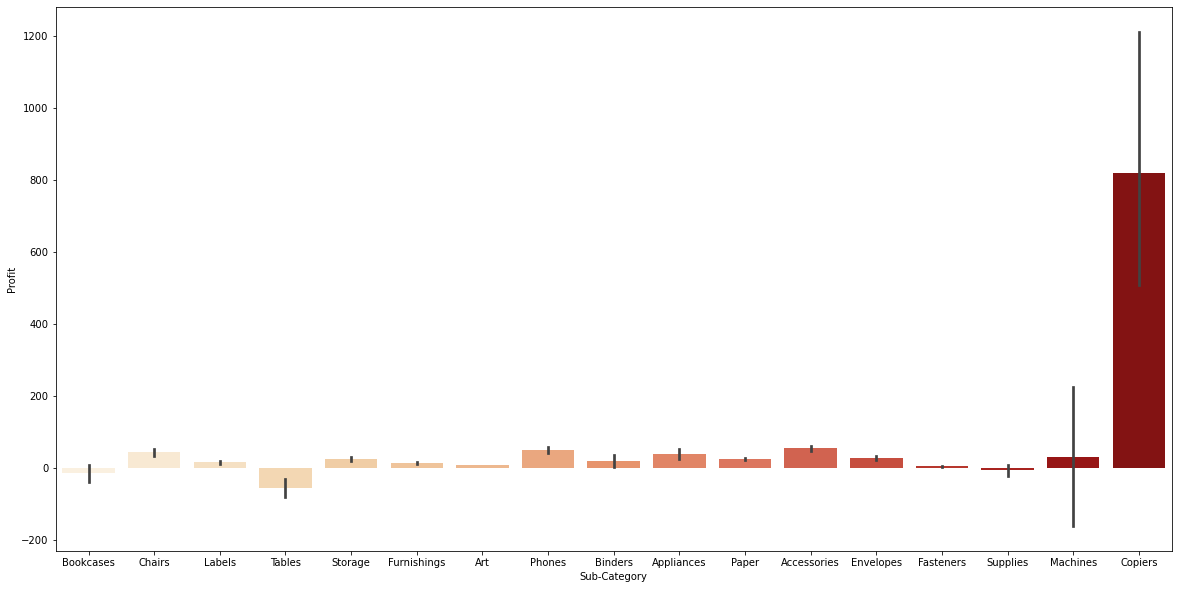

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Sub-Category'], y=df['Profit'], palette = 'OrRd')

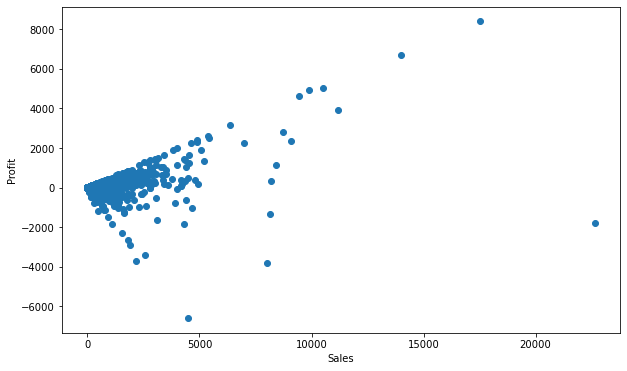

In [55]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

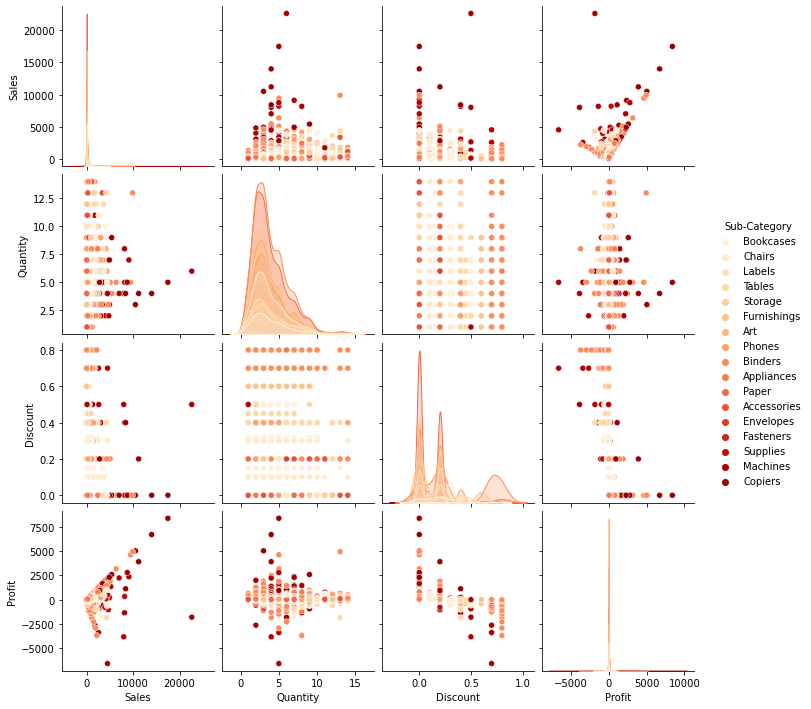

In [59]:
figsize=(15,10)
sns.pairplot(df_1,hue='Sub-Category', palette = 'OrRd')

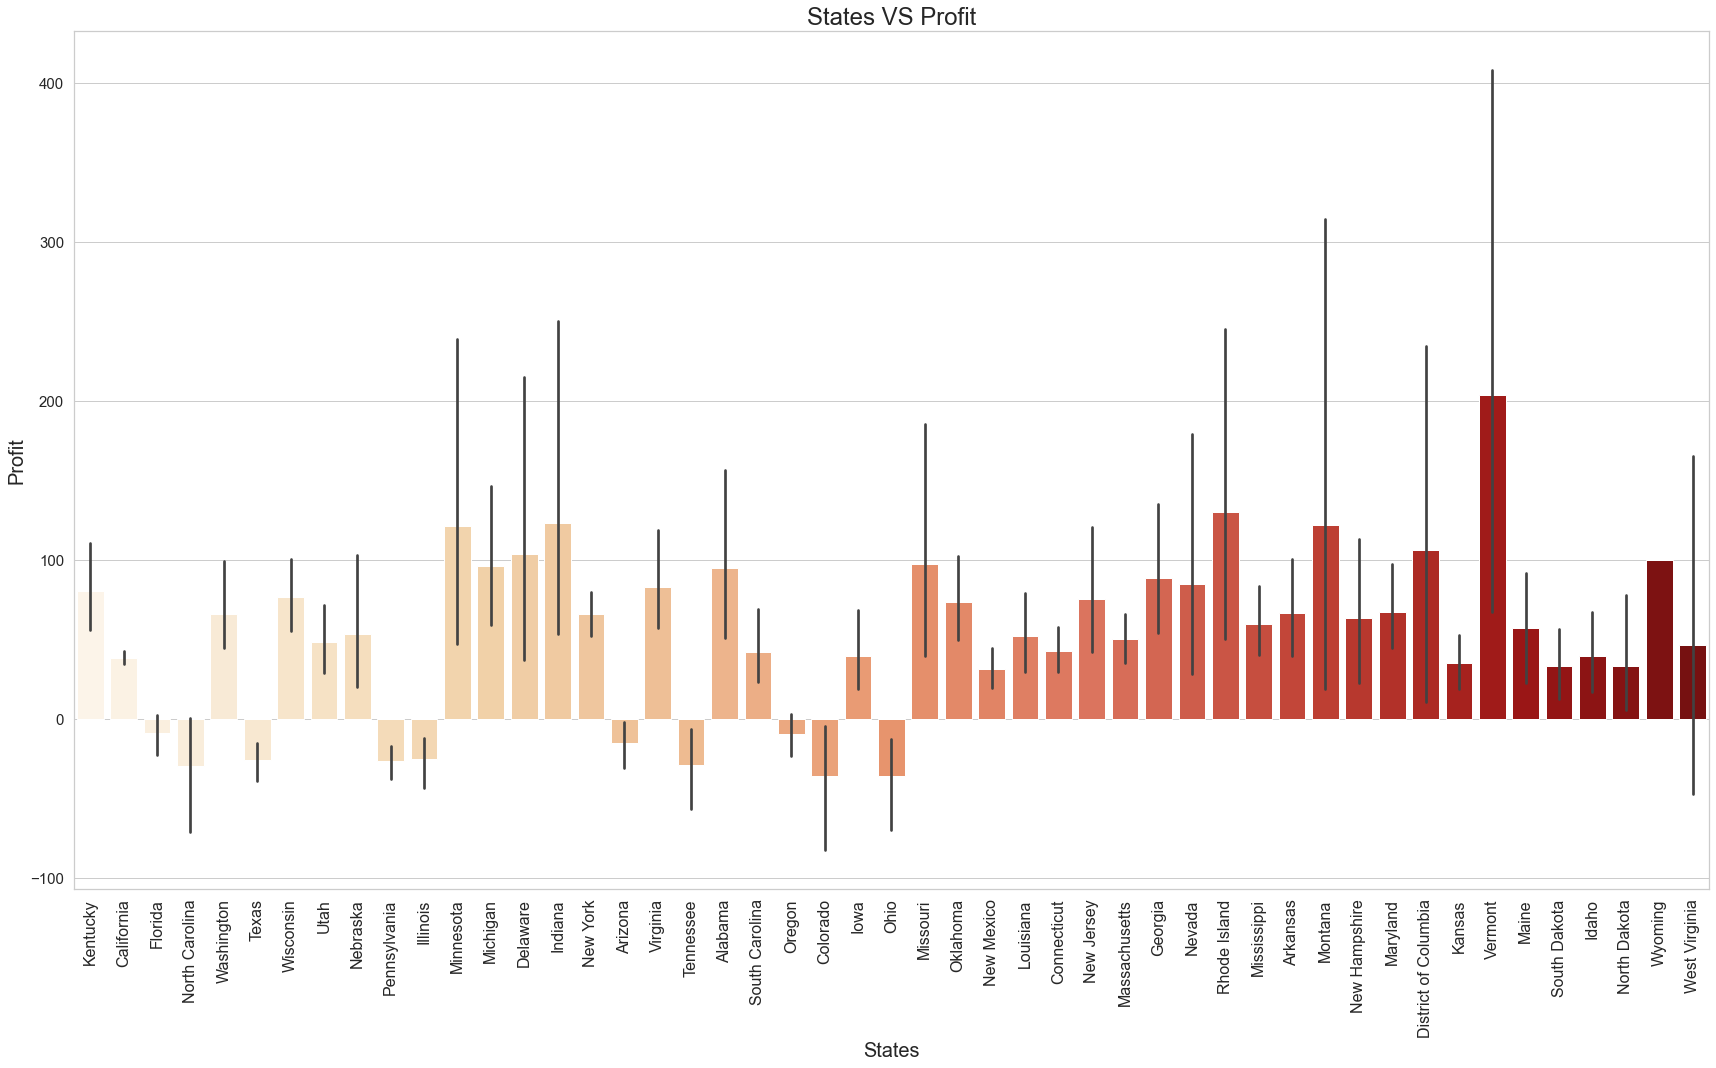

In [96]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=df_1, palette="OrRd")
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

### Thanks!